<a href="https://colab.research.google.com/github/ruhaniwalia14/Lab-1/blob/main/A_Journey_Through_Hoenn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before you do anything...
1. Make a copy of this notebook so that any progress is saved to your copy. If you
don't make a copy, your changes will be gone the next time you try to access this notebook.
2. Run the next cell to set up helper functions and examples. If you see strange errors of things not being defined, come back and run the set up cell again.

In [ ]:
#@title Run this cell (press the play button) to set up some helper functions
import itertools
import plotly.express as px
import plotly.graph_objects as go

import numpy as np
from PIL import Image
import networkx as nx

LOCATIONS = {
    "Littleroot":(44,107)
    ,"Oldale":(44, 91)
    ,"Petalburg":(19, 91)
    , "Rustboro": (12, 62)
    , "Verdanturf": (44, 67)
    , "Mauville": (80, 66)
    , "Slateport": (75, 103)
    , "Lavaridge": (52, 43)
    , "Fallarbor": (35, 19)
    , "Fortree": (108, 19)
    , "Lilycove": (163,43)
    , "Mossdeep": (208, 59)
    , "Sootopolis": (180, 75)
    , "EverGrande": (228, 87)
    , "Dewford": (27, 131)
    , "Pacificdog": (148, 99)
}

CITIES = list(LOCATIONS.keys())
XS, YS = list(zip(*list(LOCATIONS.values())))


! wget https://archives.bulbagarden.net/media/upload/1/1f/Hoenn_RSE_Map.png

HOENN_ARRAY = np.asarray(Image.open("Hoenn_RSE_Map.png"))
HOENN_ARRAY_TRANSLUCENT = HOENN_ARRAY.copy()
HOENN_ARRAY_TRANSLUCENT[:,:,3] = 125

def hoenn_map(translucent=True):
  arr = HOENN_ARRAY_TRANSLUCENT if translucent else HOENN_ARRAY
  fig = px.imshow(arr)
  fig.add_trace(
    go.Scatter(x=XS, y=YS, mode="markers", marker={"size":12, "color":"black"}, hovertext=CITIES, name="")
  )
  fig.update_layout(showlegend=False)
  return fig

def add_edge(fig, x1, y1, x2, y2, w):
  fig.add_trace(
    go.Scatter(x=[x1, x2], y=[y1,y2], mode="lines", line={"width":1, "color":"black"})
  )
  fig.add_annotation(x=(x1 + x2)/2, y=(y1 + y2)/2,
            text=str(w),
            showarrow=False,
            xshift=16,
            yshift=16,
            font={"color":"black", "size":16}
  )
  fig.update_layout(showlegend=False)
  return fig

def add_edge_manhattan(fig, x1, y1, x2, y2, w):
  fig.add_trace(
  go.Scatter(x=[x1, x2, x2], y=[y1, y1, y2], mode="lines", line={"width":1, "color":"black"})
  )
  fig.add_annotation(x=x1, y=y1,
            text=str(w),
            showarrow=False,
            xshift=16 if x2 > x1 else -16,
            yshift=16 if y2 < y1 else -16,
            font={"color":"black", "size":16}
  )
  fig.update_layout(showlegend=False)
  return fig

def plot_graph(g, manhattan=False):
  fig = hoenn_map()
  for u, v in g.edges():
    x1, y1 = LOCATIONS[u]
    x2, y2 = LOCATIONS[v]
    if manhattan:
      add_edge_manhattan(fig, x1, y1, x2, y2, g.edges[(u, v)]['weight'])
    else:
      add_edge(fig, x1, y1, x2, y2, g.edges[(u, v)]['weight'])
  fig.show()

--2023-05-10 19:32:21--  https://archives.bulbagarden.net/media/upload/1/1f/Hoenn_RSE_Map.png
Resolving archives.bulbagarden.net (archives.bulbagarden.net)... 172.64.106.20, 172.64.107.20, 2606:4700:e0::ac40:6b14, ...
Connecting to archives.bulbagarden.net (archives.bulbagarden.net)|172.64.106.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8409 (8.2K) [image/png]
Saving to: ‘Hoenn_RSE_Map.png.1’

Hoenn_RSE_Map.png.1 100%[===================>]   8.21K  --.-KB/s    in 0s      

2023-05-10 19:32:21 (67.8 MB/s) - ‘Hoenn_RSE_Map.png.1’ saved [8409/8409]



# Getting Started
* `LOCATIONS` is a dictionary mapping cities to their $(x, y)$-coordinate
* `CITIES` is a list of cities in the Hoenn Region

Run the next cell to see what they look like

In [ ]:
display(LOCATIONS)
print()
display(CITIES)

{'Littleroot': (44, 107),
 'Oldale': (44, 91),
 'Petalburg': (19, 91),
 'Rustboro': (12, 62),
 'Verdanturf': (44, 67),
 'Mauville': (80, 66),
 'Slateport': (75, 103),
 'Lavaridge': (52, 43),
 'Fallarbor': (35, 19),
 'Fortree': (108, 19),
 'Lilycove': (163, 43),
 'Mossdeep': (208, 59),
 'Sootopolis': (180, 75),
 'EverGrande': (228, 87),
 'Dewford': (27, 131),
 'Pacificdog': (148, 99)}

['Littleroot',
 'Oldale',
 'Petalburg',
 'Rustboro',
 'Verdanturf',
 'Mauville',
 'Slateport',
 'Lavaridge',
 'Fallarbor',
 'Fortree',
 'Lilycove',
 'Mossdeep',
 'Sootopolis',
 'EverGrande',
 'Dewford',
 'Pacificdog']

Here's how to create a networkx Graph and add a weighted edge. See [here](https://networkx.org/documentation/stable/reference/classes/graph.html#methods) for documentation on the Graph class.

In [ ]:
G = nx.Graph()
G.add_nodes_from(CITIES)
G.add_edge("Littleroot", "Lilycove", weight=123)
print(G)

Graph with 16 nodes and 1 edges


I have provided a function called `plot_graph` which accepts a networkx graph with nodes corresponding to the elements of CITIES and weighted edges.

It takes an optional argument `manhattan` (default False). Toggle it to see what it does.



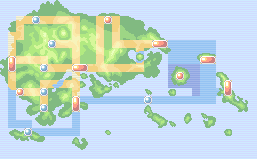

In [ ]:
plot_graph(G, manhattan=True)

# Task 1: Create the Graph

In the classic Pokemon games, you can only move up down left and right. Imagine, to simplify the problem a bit, that there are no restrictions regarding blocked paths or water (i.e. you can walk on any part on the map). Create a graph with edge weights corresponding to the shortest distance between two nodes when you can only move up/down/left/right.

# Task 2: Model and solve the problem

You are planning a trip to visit all the cities in the Hoenn region.

What graph problem corresponds to visiting all the cities and returning home in the fewest steps? After identifying the problem, look at the networkx documentation and call the appropriate function to solve the problem (approximately).

Then, plot the resulting cycle and report the total distance traveled.

The `edge_subgraph` function might be useful when plotting

# Task 3: Fly

In the Pokemon games, if you have a Pokemon who knows the move "Fly", you can revisit any city you have previously been to for FREE.

Now assume you have a Pokemon who knows "Fly" at the start of your journey. Model the task of visiting all of the cities as a graph problem. Justify informally, why solving this graph problem on your chosen graph corresponds to finding the most efficient way to visit all the cities when you are allowed to fly back to any city you have already visited.

Solve it using an appropriate function provided by Networkx.

Plot the result, and calculate the total number of steps taken.

# Task 4: Walking in any direction

More realistically, we can walk in any direction we want.

Repeat tasks 1 and 2 without the restriction that you can only walk up/down/left/right

# Task 5

Take the problem of visiting every city when you have a Pokemon who knows "Fly". Is the optimal solution different when you can only move up/down/left/right versus when you can move in any direction?

# (Optional)
For fun, add 30 more sites to visit by running the next cell.

In [ ]:
for i in range(30):
  LOCATIONS[f"{i}"] = tuple(np.random.randint(2, [256, 158]))

CITIES = list(LOCATIONS.keys())
XS, YS = list(zip(*list(LOCATIONS.values())))